In [3]:
# Imports we will use
import torch
import gc
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Function
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import random
from pathlib import Path
from sklearn.metrics import r2_score
from astropy.visualization import make_lupton_rgb
from sklearn.manifold import Isomap
from train_utils import *
import time
import os
import json

%matplotlib inline

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Set Seed
torch.manual_seed(22)

# Find if cuda is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [4]:
# Load in data
head = Path.cwd().parents[3]
source_img_path = head / 'data/delve_source_2/delve_source_2.npy'
target_img_path = head / 'data/delve_target_2/delve_target_2.npy'
source_meta = head / 'data/delve_source_2/delve_source_2_metadata.csv'
target_meta = head / 'data/delve_target_2/delve_target_2_metadata.csv'
batch_size = 32
source_train_dataloader, source_test_dataloader, source_val_dataloader, source_data = create_dataloader(source_img_path, source_meta, batch_size)
target_train_dataloader, target_test_dataloader, target_val_dataloader, target_data = create_dataloader(target_img_path, target_meta, batch_size)

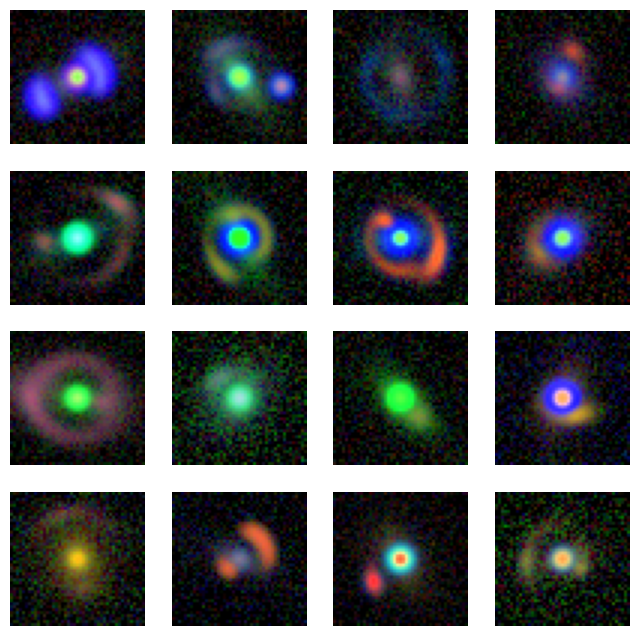

In [5]:
# Visualize source data
visualize_data(source_data)

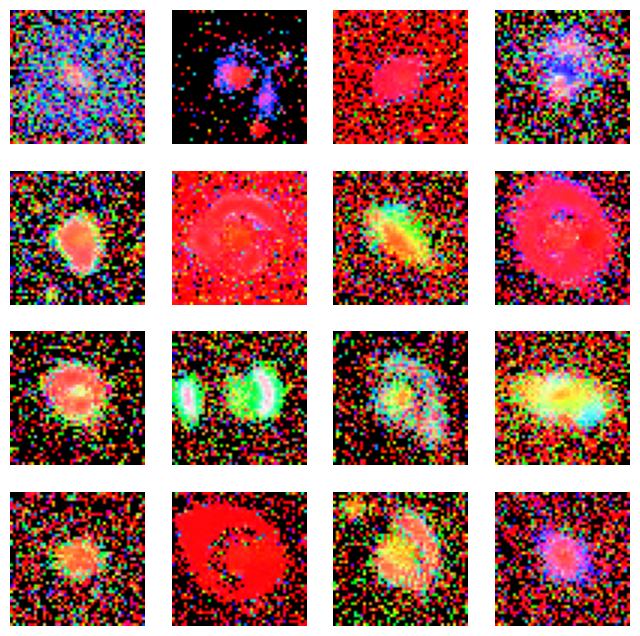

In [6]:
# Visualize target data
visualize_data(target_data)

In [7]:
from matplotlib.colors import PowerNorm

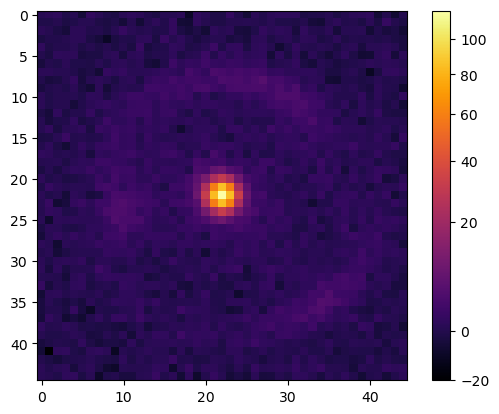

In [21]:
plt.imshow(source_data[2, 0, :, :], norm = PowerNorm(0.5), cmap = 'inferno')
plt.colorbar()

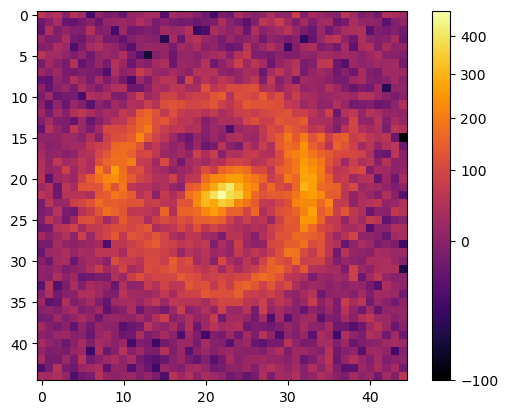

In [23]:
plt.imshow(target_data[12, 1, :, :], norm = PowerNorm(0.5), cmap = 'inferno')
plt.colorbar()

In [37]:
model = NeuralNetwork(npix=45).cuda()
learning_rate = 1e-5
epochs = 200
# Define loss functions and optimizer
regressor_loss_fn = nn.MSELoss().cuda()

# Try to adjust momentum -> see if that helps
# Try SGD, Adadelta, see if that helps
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
da_loss = MMD_loss()

source_labels = pd.read_csv(source_meta)['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].tolist()[:1000]
target_labels = pd.read_csv(target_meta)['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].tolist()[:1000]

In [25]:
mod_name = None #"models/mb_lenscolor_jul25_0030" #
stats = {'train_DA_loss':[],
             'train_regression_loss':[],
             'train_r2_score':[],
             'val_source_regression_loss':[],
             'val_target_regression_loss':[],
             'val_source_r2_score':[],
             'val_target_r2_score':[],
            'epoch_no': 0}
if mod_name is not None:
    state = torch.load(mod_name)
    model.load_state_dict(state['state_dict'])
    optimizer.load_state_dict(state['optimizer'])
    
    stat_file = Path(mod_name+'.json')
    if stat_file.is_file():
        stats = json.load(open(mod_name+'.json', 'r'))

Beginning Training...
Generating Isomap...


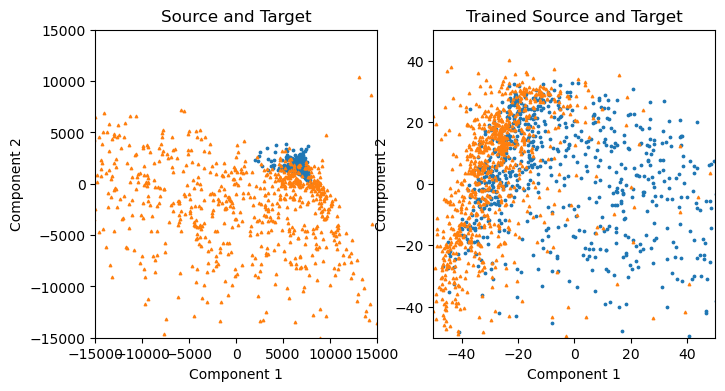

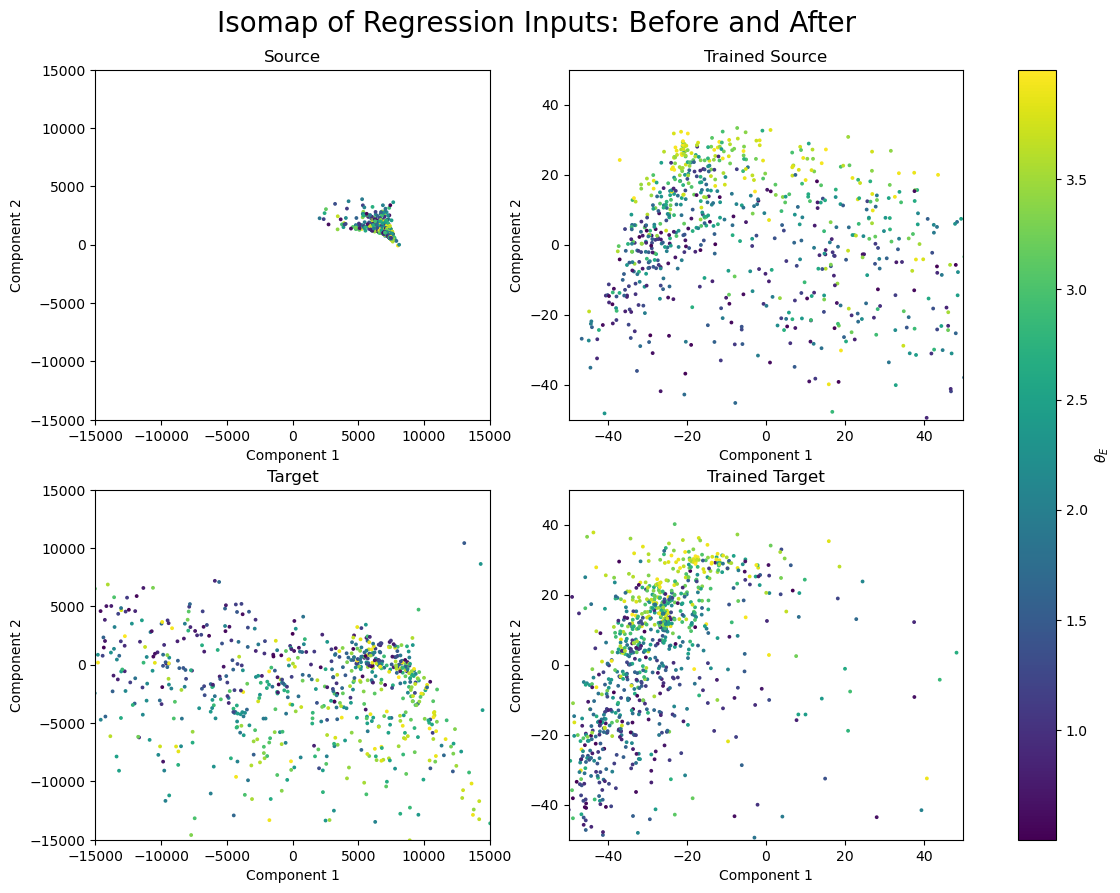


Epoch 0: 20.15s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.2841
	Train Regression Loss: : 0.6870
	Train R2 Score: : 0.2980
 Validation Statistics:
	Val Source Regression Loss: : 0.3795
	Val Target Regression Loss: : 1.0330
	Val Source R2 Score: : 0.6039
	Val Target R2 Score: : -0.0483

Epoch 1: 18.25s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.2241
	Train Regression Loss: : 0.3476
	Train R2 Score: : 0.6440
 Validation Statistics:
	Val Source Regression Loss: : 0.2987
	Val Target Regression Loss: : 0.6456
	Val Source R2 Score: : 0.6924
	Val Target R2 Score: : 0.3370

Epoch 2: 17.80s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.2096
	Train Regression Loss: : 0.2777
	Train R2 Score: : 0.7165
 Validation Statistics:
	Val Source Regression Loss: : 0.2594
	Val Target Regression Loss: : 0.5397
	Val Source R2 Score: : 0.7319
	Val Target R2 Score: : 0.4506

Epoch 3: 15.22s
-------------------------------

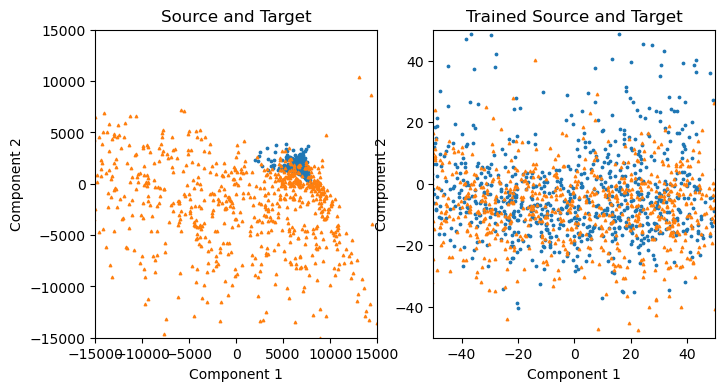

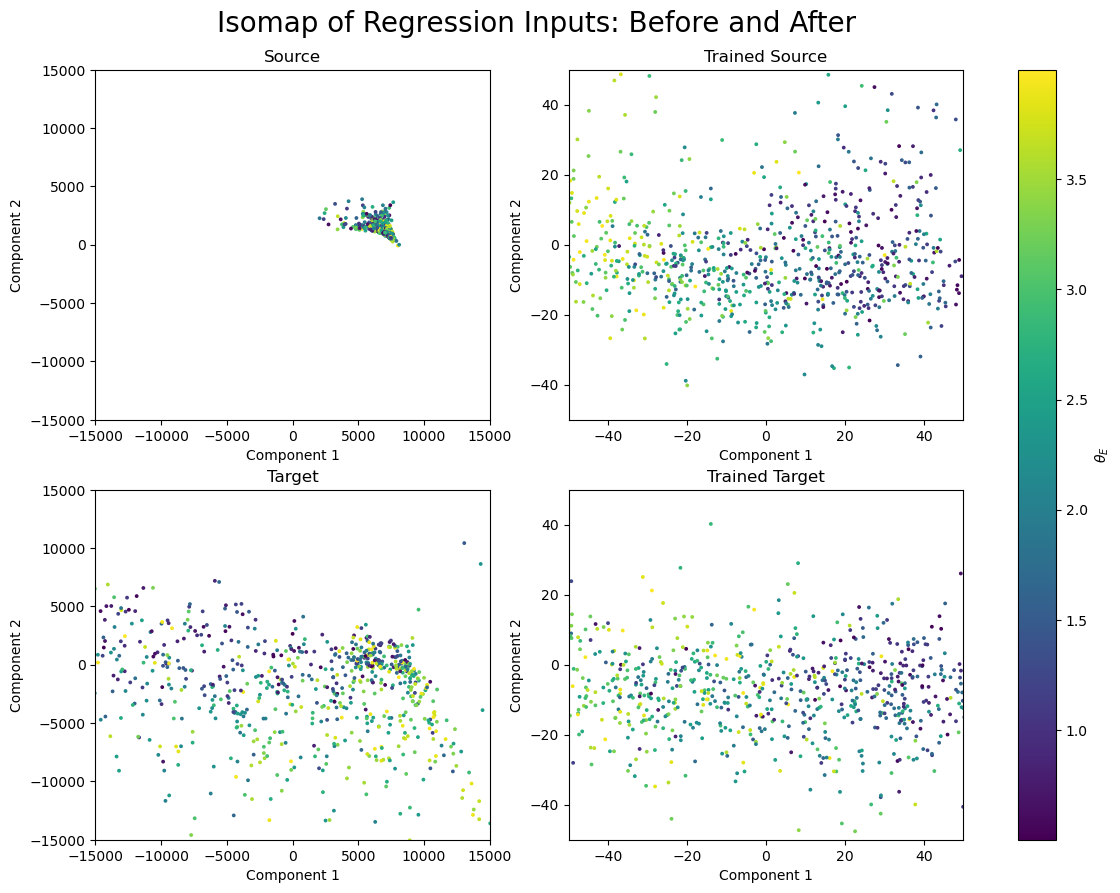


Epoch 5: 17.99s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1959
	Train Regression Loss: : 0.1828
	Train R2 Score: : 0.8123
 Validation Statistics:
	Val Source Regression Loss: : 0.1775
	Val Target Regression Loss: : 0.3965
	Val Source R2 Score: : 0.8137
	Val Target R2 Score: : 0.5962

Epoch 6: 16.53s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1911
	Train Regression Loss: : 0.1645
	Train R2 Score: : 0.8314
 Validation Statistics:
	Val Source Regression Loss: : 0.1639
	Val Target Regression Loss: : 0.3921
	Val Source R2 Score: : 0.8279
	Val Target R2 Score: : 0.5979

Epoch 7: 20.16s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1916
	Train Regression Loss: : 0.1534
	Train R2 Score: : 0.8429
 Validation Statistics:
	Val Source Regression Loss: : 0.1529
	Val Target Regression Loss: : 0.3879
	Val Source R2 Score: : 0.8397
	Val Target R2 Score: : 0.5982

Epoch 8: 15.58s
-------------------------------


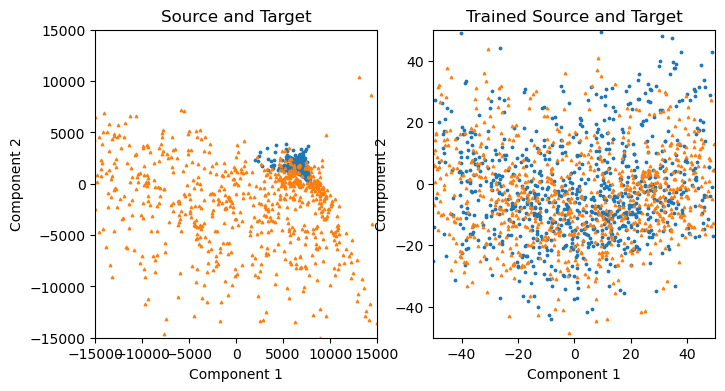

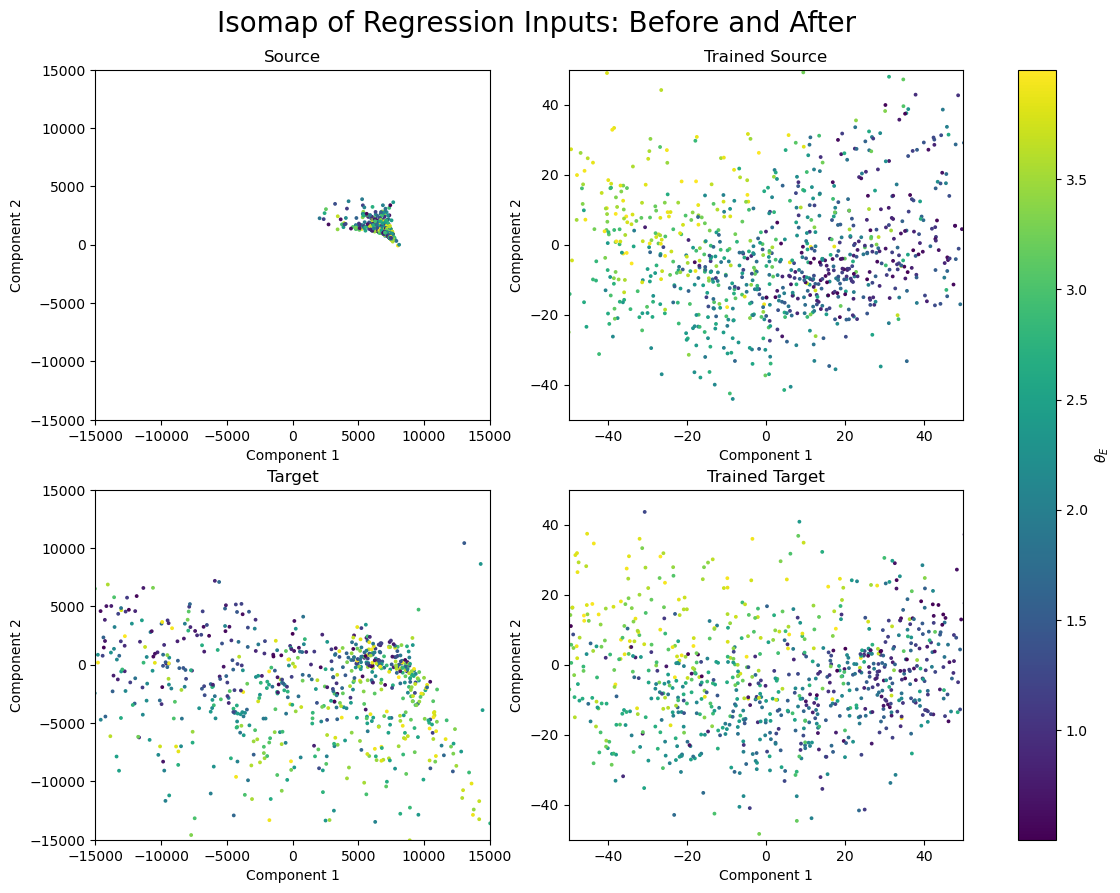


Epoch 10: 18.27s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1880
	Train Regression Loss: : 0.1273
	Train R2 Score: : 0.8693
 Validation Statistics:
	Val Source Regression Loss: : 0.1334
	Val Target Regression Loss: : 0.3426
	Val Source R2 Score: : 0.8609
	Val Target R2 Score: : 0.6483

Epoch 11: 14.95s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1879
	Train Regression Loss: : 0.1227
	Train R2 Score: : 0.8742
 Validation Statistics:
	Val Source Regression Loss: : 0.1284
	Val Target Regression Loss: : 0.3534
	Val Source R2 Score: : 0.8681
	Val Target R2 Score: : 0.6405

Epoch 12: 15.77s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1871
	Train Regression Loss: : 0.1187
	Train R2 Score: : 0.8772
 Validation Statistics:
	Val Source Regression Loss: : 0.1243
	Val Target Regression Loss: : 0.3504
	Val Source R2 Score: : 0.8693
	Val Target R2 Score: : 0.6432

Epoch 13: 14.01s
----------------------------

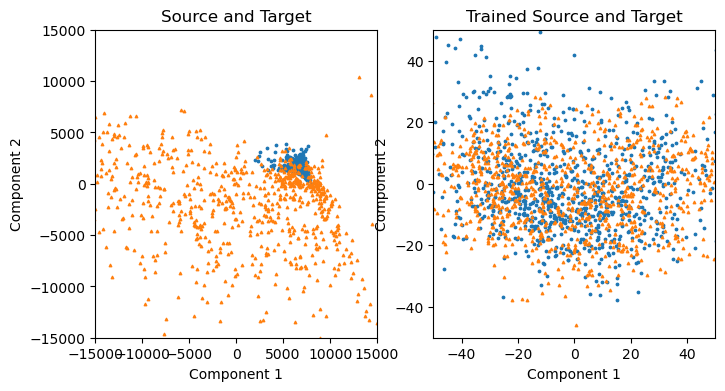

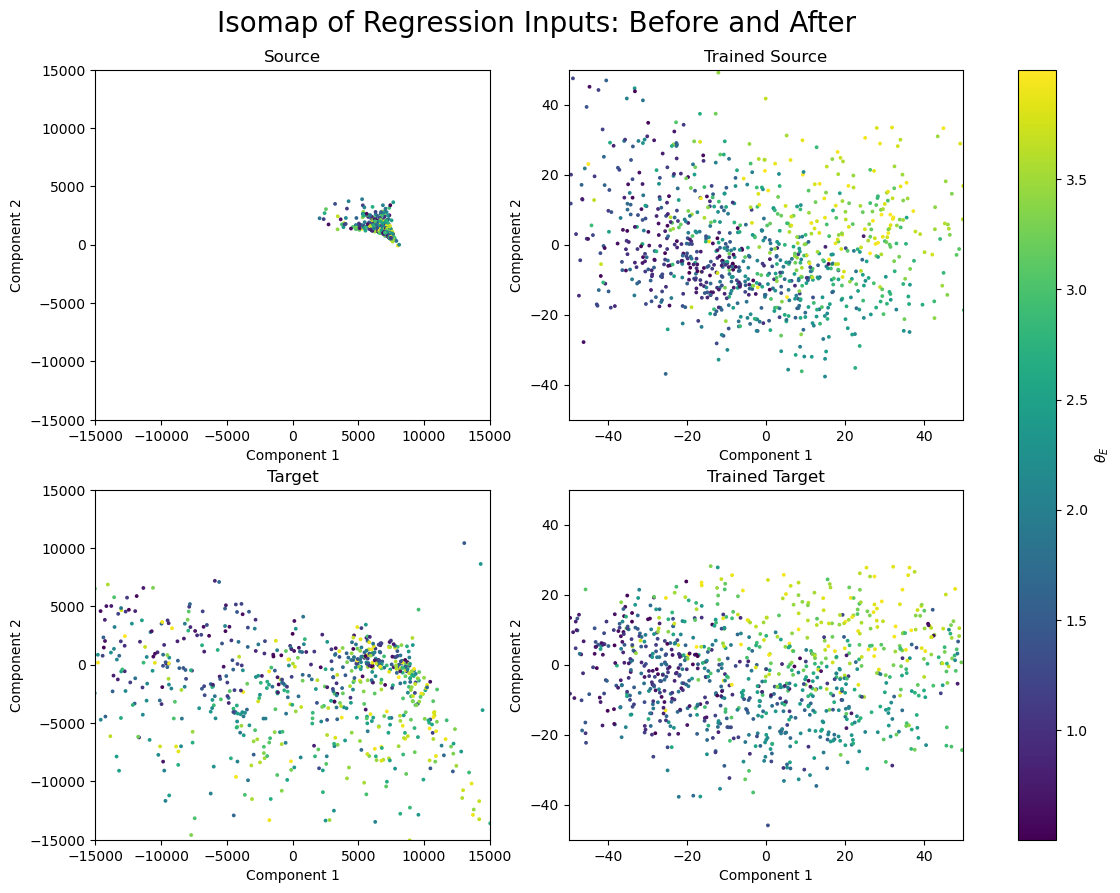


Epoch 15: 20.87s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1856
	Train Regression Loss: : 0.1064
	Train R2 Score: : 0.8907
 Validation Statistics:
	Val Source Regression Loss: : 0.1175
	Val Target Regression Loss: : 0.3524
	Val Source R2 Score: : 0.8782
	Val Target R2 Score: : 0.6396

Epoch 16: 17.05s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1848
	Train Regression Loss: : 0.1041
	Train R2 Score: : 0.8935
 Validation Statistics:
	Val Source Regression Loss: : 0.1097
	Val Target Regression Loss: : 0.3335
	Val Source R2 Score: : 0.8860
	Val Target R2 Score: : 0.6607

Epoch 17: 14.23s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1842
	Train Regression Loss: : 0.1014
	Train R2 Score: : 0.8960
 Validation Statistics:
	Val Source Regression Loss: : 0.1137
	Val Target Regression Loss: : 0.3190
	Val Source R2 Score: : 0.8780
	Val Target R2 Score: : 0.6760

Epoch 18: 15.57s
----------------------------

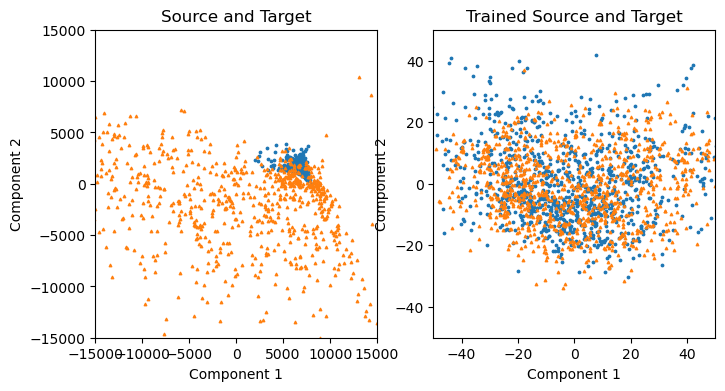

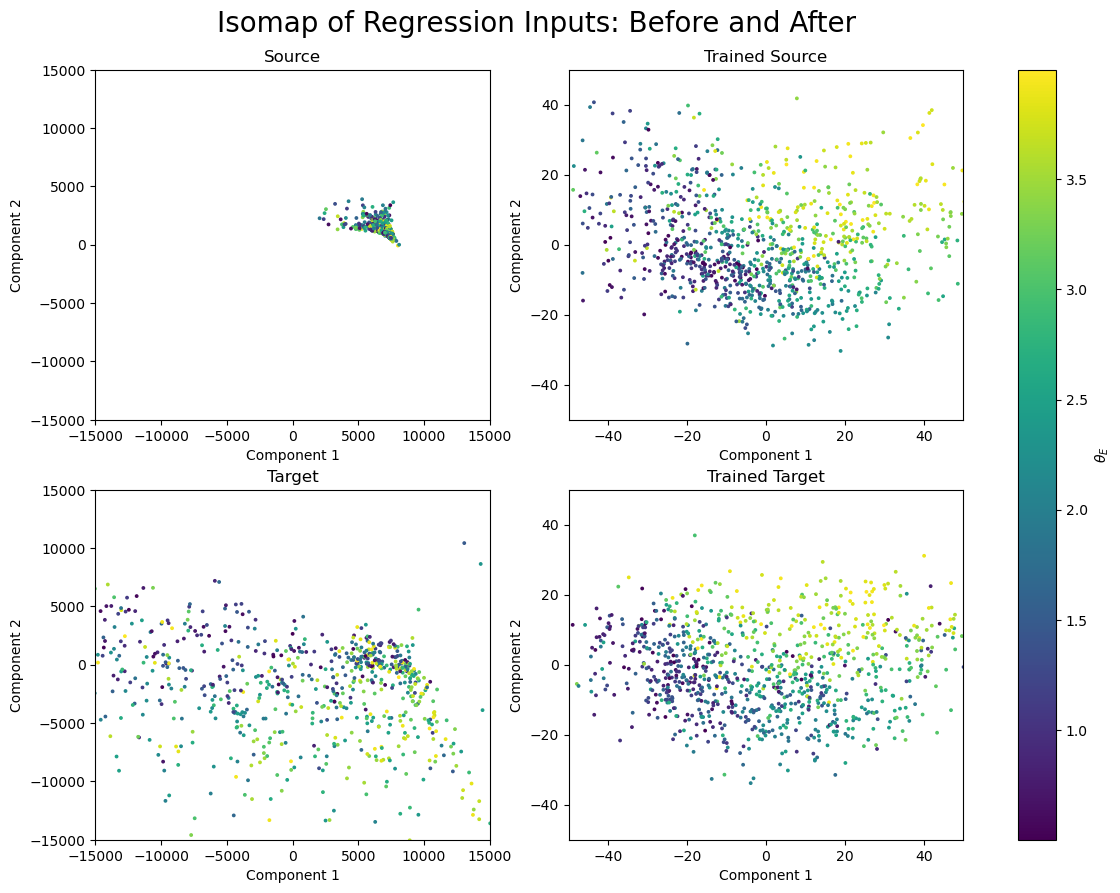


Epoch 20: 20.01s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1834
	Train Regression Loss: : 0.0948
	Train R2 Score: : 0.9024
 Validation Statistics:
	Val Source Regression Loss: : 0.1057
	Val Target Regression Loss: : 0.3441
	Val Source R2 Score: : 0.8904
	Val Target R2 Score: : 0.6508

Epoch 21: 15.55s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1849
	Train Regression Loss: : 0.0934
	Train R2 Score: : 0.9040
 Validation Statistics:
	Val Source Regression Loss: : 0.1004
	Val Target Regression Loss: : 0.3320
	Val Source R2 Score: : 0.8964
	Val Target R2 Score: : 0.6640

Epoch 22: 14.24s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1840
	Train Regression Loss: : 0.0918
	Train R2 Score: : 0.9061
 Validation Statistics:
	Val Source Regression Loss: : 0.1051
	Val Target Regression Loss: : 0.3160
	Val Source R2 Score: : 0.8911
	Val Target R2 Score: : 0.6718

Epoch 23: 15.10s
----------------------------

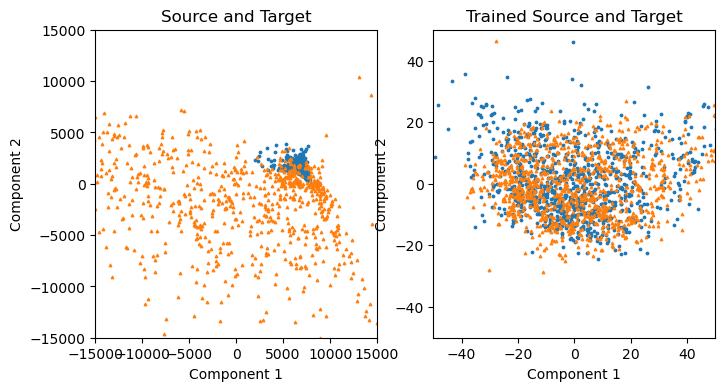

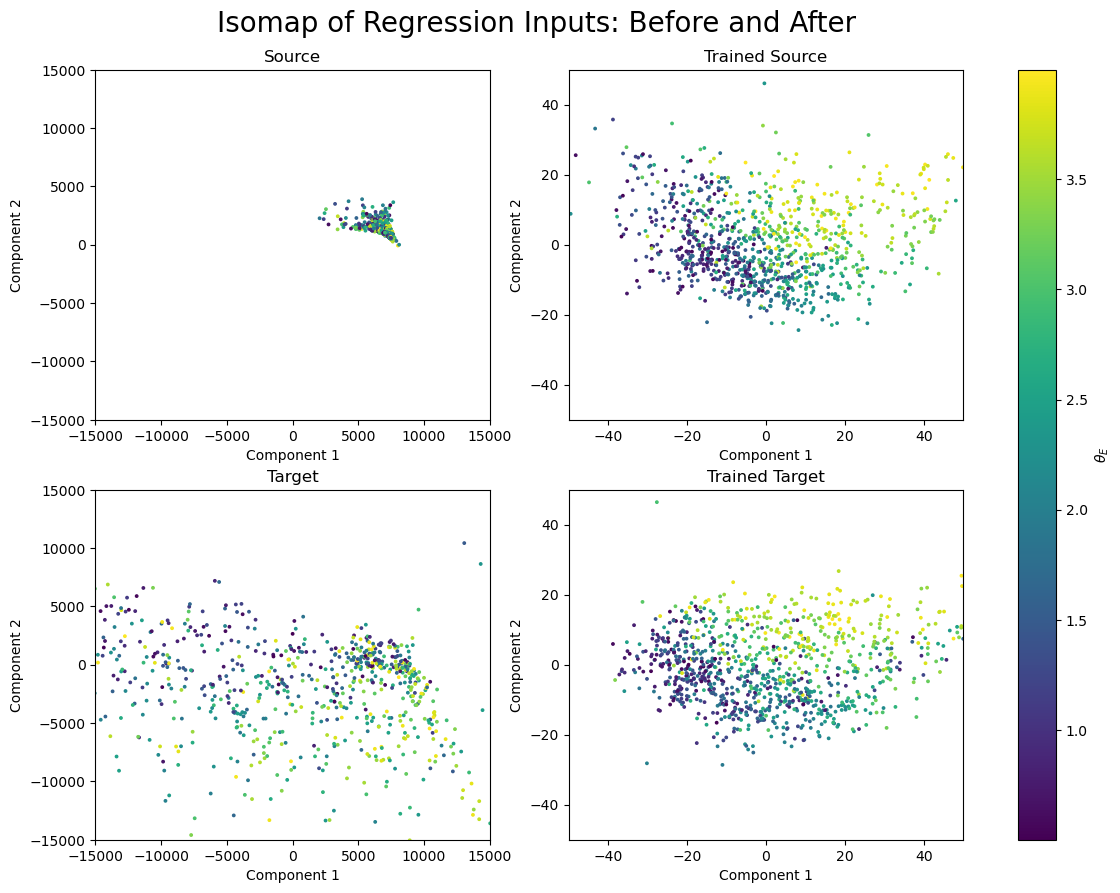


Epoch 25: 20.87s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1838
	Train Regression Loss: : 0.0893
	Train R2 Score: : 0.9081
 Validation Statistics:
	Val Source Regression Loss: : 0.0992
	Val Target Regression Loss: : 0.3186
	Val Source R2 Score: : 0.8967
	Val Target R2 Score: : 0.6754

Epoch 26: 15.58s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1831
	Train Regression Loss: : 0.0879
	Train R2 Score: : 0.9100
 Validation Statistics:
	Val Source Regression Loss: : 0.0981
	Val Target Regression Loss: : 0.3373
	Val Source R2 Score: : 0.8992
	Val Target R2 Score: : 0.6539

Epoch 27: 14.92s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1838
	Train Regression Loss: : 0.0876
	Train R2 Score: : 0.9103
 Validation Statistics:
	Val Source Regression Loss: : 0.0963
	Val Target Regression Loss: : 0.3130
	Val Source R2 Score: : 0.9003
	Val Target R2 Score: : 0.6786

Epoch 28: 16.72s
----------------------------

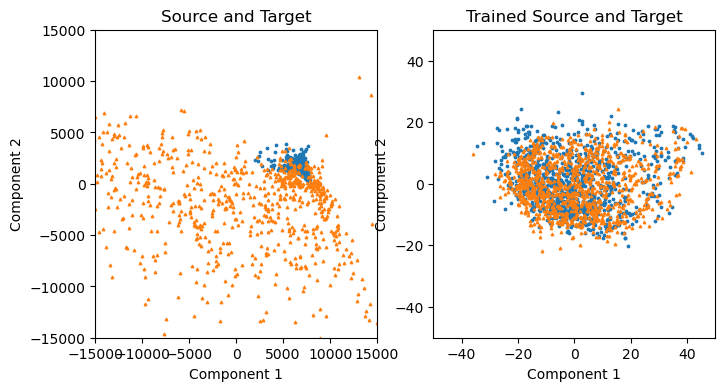

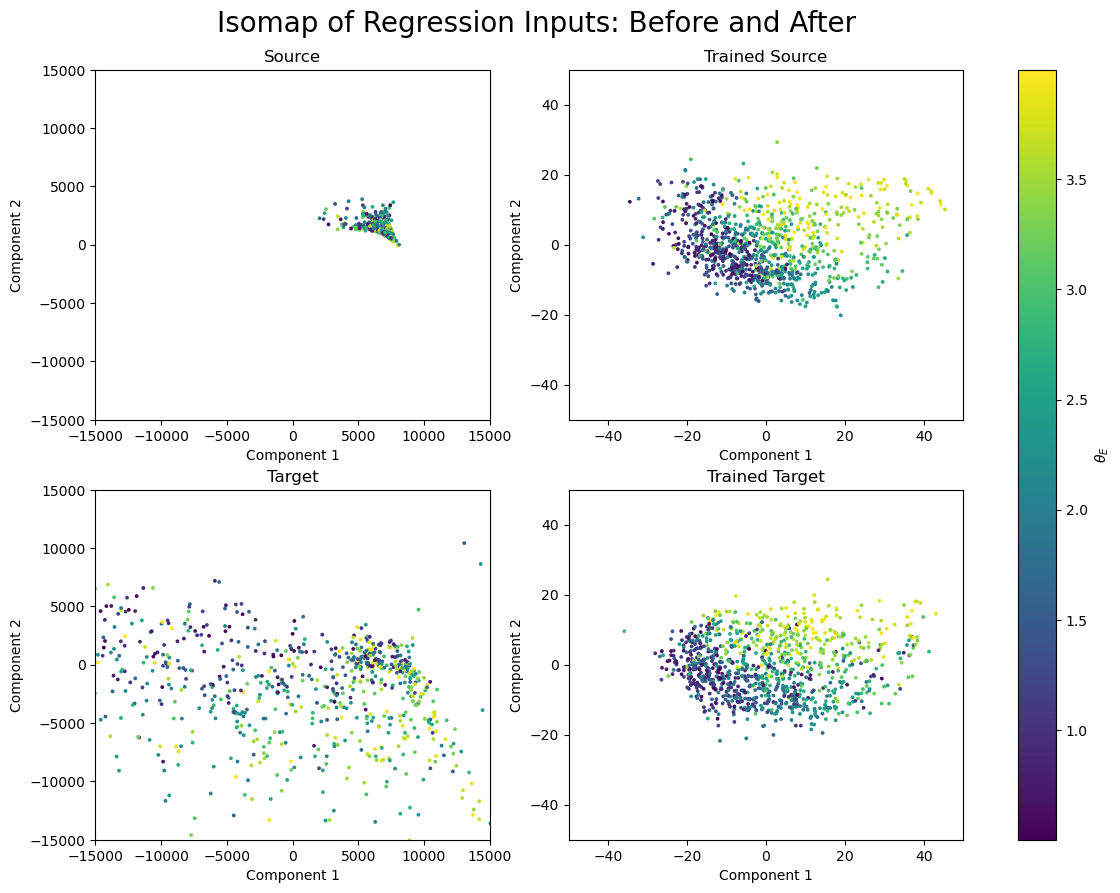


Epoch 30: 18.98s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1848
	Train Regression Loss: : 0.0865
	Train R2 Score: : 0.9112
 Validation Statistics:
	Val Source Regression Loss: : 0.0940
	Val Target Regression Loss: : 0.3113
	Val Source R2 Score: : 0.9022
	Val Target R2 Score: : 0.6798

Epoch 31: 19.30s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1847
	Train Regression Loss: : 0.0862
	Train R2 Score: : 0.9117
 Validation Statistics:
	Val Source Regression Loss: : 0.0948
	Val Target Regression Loss: : 0.3157
	Val Source R2 Score: : 0.9000
	Val Target R2 Score: : 0.6780

Epoch 32: 18.40s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1855
	Train Regression Loss: : 0.0856
	Train R2 Score: : 0.9120
 Validation Statistics:
	Val Source Regression Loss: : 0.0964
	Val Target Regression Loss: : 0.3228
	Val Source R2 Score: : 0.9008
	Val Target R2 Score: : 0.6729

Epoch 33: 15.96s
----------------------------

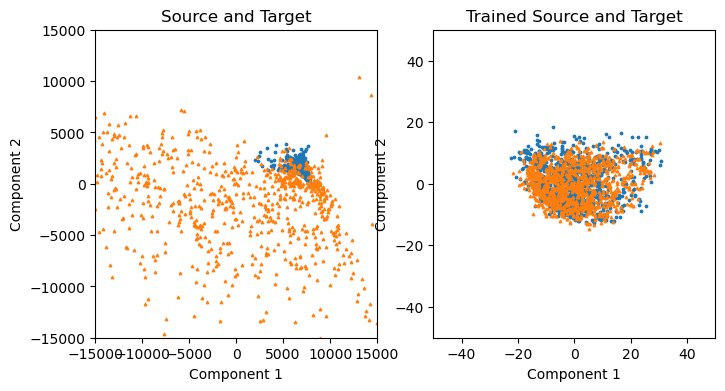

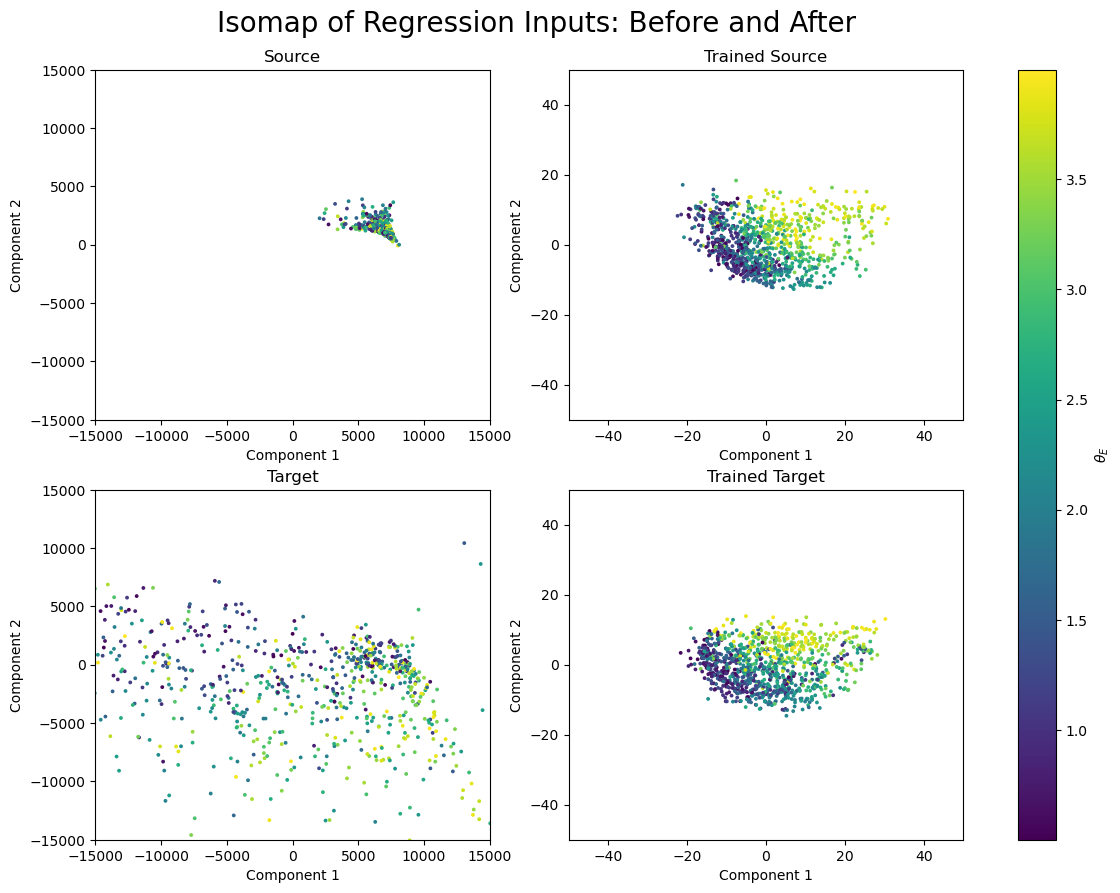


Epoch 35: 22.34s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1859
	Train Regression Loss: : 0.0859
	Train R2 Score: : 0.9115
 Validation Statistics:
	Val Source Regression Loss: : 0.0917
	Val Target Regression Loss: : 0.3226
	Val Source R2 Score: : 0.9044
	Val Target R2 Score: : 0.6696

Epoch 36: 15.96s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1856
	Train Regression Loss: : 0.0861
	Train R2 Score: : 0.9117
 Validation Statistics:
	Val Source Regression Loss: : 0.0971
	Val Target Regression Loss: : 0.3391
	Val Source R2 Score: : 0.8992
	Val Target R2 Score: : 0.6515

Epoch 37: 15.44s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1850
	Train Regression Loss: : 0.0862
	Train R2 Score: : 0.9119
 Validation Statistics:
	Val Source Regression Loss: : 0.0993
	Val Target Regression Loss: : 0.3137
	Val Source R2 Score: : 0.8960
	Val Target R2 Score: : 0.6793

Epoch 38: 18.70s
----------------------------

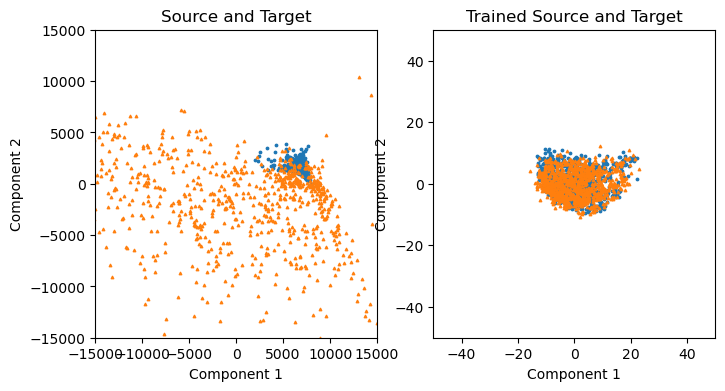

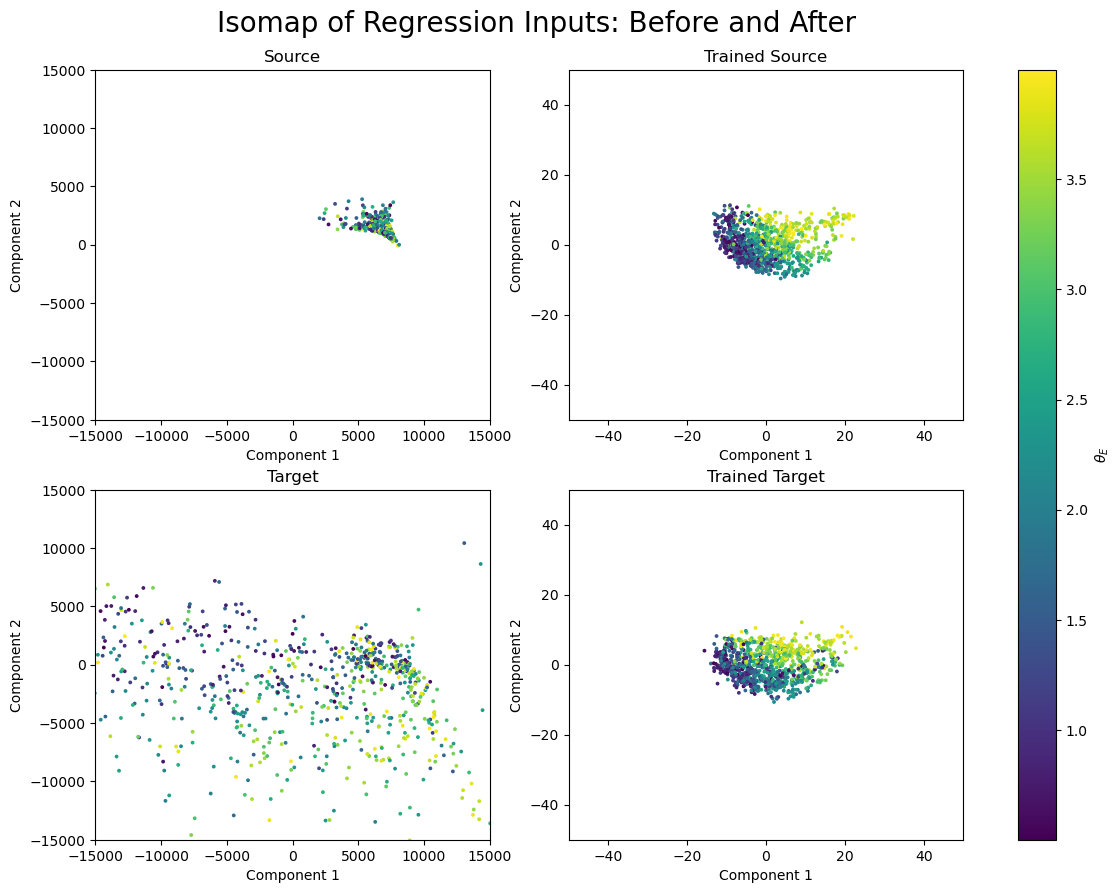


Epoch 40: 16.48s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1850
	Train Regression Loss: : 0.0880
	Train R2 Score: : 0.9090
 Validation Statistics:
	Val Source Regression Loss: : 0.0928
	Val Target Regression Loss: : 0.3300
	Val Source R2 Score: : 0.9037
	Val Target R2 Score: : 0.6640

Epoch 41: 14.90s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1848
	Train Regression Loss: : 0.0876
	Train R2 Score: : 0.9099
 Validation Statistics:
	Val Source Regression Loss: : 0.0932
	Val Target Regression Loss: : 0.3321
	Val Source R2 Score: : 0.9026
	Val Target R2 Score: : 0.6616

Epoch 42: 16.11s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1861
	Train Regression Loss: : 0.0878
	Train R2 Score: : 0.9094
 Validation Statistics:
	Val Source Regression Loss: : 0.0923
	Val Target Regression Loss: : 0.3288
	Val Source R2 Score: : 0.9051
	Val Target R2 Score: : 0.6644

Epoch 43: 16.38s
----------------------------

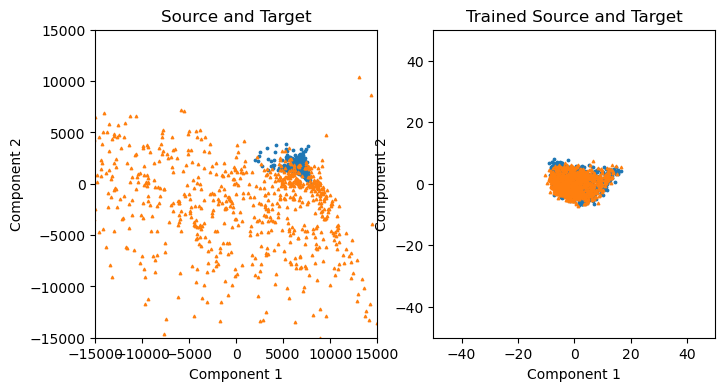

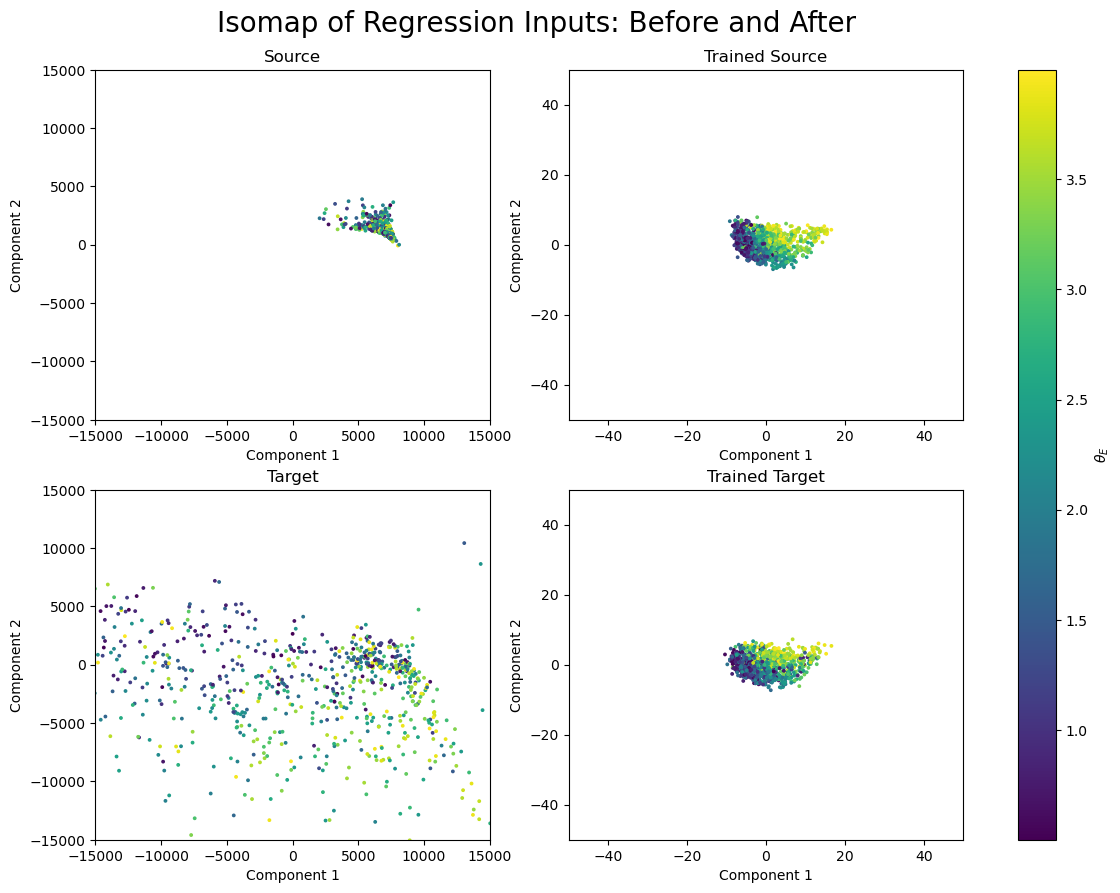


Epoch 45: 14.92s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1860
	Train Regression Loss: : 0.0907
	Train R2 Score: : 0.9070
 Validation Statistics:
	Val Source Regression Loss: : 0.0941
	Val Target Regression Loss: : 0.3495
	Val Source R2 Score: : 0.9017
	Val Target R2 Score: : 0.6426

Epoch 46: 15.84s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1858
	Train Regression Loss: : 0.0924
	Train R2 Score: : 0.9049
 Validation Statistics:
	Val Source Regression Loss: : 0.0933
	Val Target Regression Loss: : 0.3421
	Val Source R2 Score: : 0.9029
	Val Target R2 Score: : 0.6485

Epoch 47: 15.56s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1864
	Train Regression Loss: : 0.0936
	Train R2 Score: : 0.9042
 Validation Statistics:
	Val Source Regression Loss: : 0.1040
	Val Target Regression Loss: : 0.3229
	Val Source R2 Score: : 0.8917
	Val Target R2 Score: : 0.6710

Epoch 48: 15.68s
----------------------------

In [26]:
print("Beginning Training...")
mod_name = "models/mb_lenscolor_jul25_0200"
# Train
for i in range(stats['epoch_no'], stats['epoch_no'] + epochs):
        if (i % 5 == 0):
            print("Generating Isomap...")
            source_iso, target_iso, trained_source_iso, trained_target_iso = generate_isomaps(source_data, target_data, model)
            show_isomaps(source_iso, target_iso, trained_source_iso, trained_target_iso, source_labels, target_labels, mod_name, stats["epoch_no"], 15000, 50, save = True)
            
        start_time = time.time()
        vals = train_loop(source_train_dataloader, target_train_dataloader, model,
                   regressor_loss_fn, da_loss, optimizer, epochs, i, 2.5, 1.5)

        vals_validate = test_loop(source_val_dataloader, target_val_dataloader,
                         model, regressor_loss_fn, da_loss, epochs, i)

        stats['train_DA_loss'].append(vals[0])
        stats['train_regression_loss'].append(vals[1])
        stats['train_r2_score'].append(vals[2])
        stats['val_source_regression_loss'].append(vals_validate[1])
        stats['val_target_regression_loss'].append(vals_validate[2])
        stats['val_source_r2_score'].append(vals_validate[3])
        stats['val_target_r2_score'].append(vals_validate[4])
        stats['epoch_no'] += 1
        print_epoch_scores(stats, i, time.time() - start_time)

In [27]:
state = {
    'epoch': stats['epoch_no'],
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict(),
}

#mod_name = mod_name = "models/mb_isomap_jul22_2153_100ep"
torch.save(state, mod_name)
json.dump(stats, open(mod_name+'.json', 'w'))

In [10]:
#mod_name = "models/mb_isomap_jul18_6pm"
model.load_state_dict(torch.load(mod_name)['state_dict'])
stats = json.load(open(mod_name+'.json', 'r'))

In [21]:
def generate_isomaps(source_data, target_data, model, n_neighbors = 5, n_components = 2, n_points = 1000):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    gc.collect()
    torch.cuda.empty_cache()
    
    isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
    train_isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
    
    sdata = source_data.reshape([-1, np.prod(source_data.shape[1:])])[:n_points]
    tdata = target_data.reshape([-1, np.prod(target_data.shape[1:])])[:n_points]
    catdata = np.concatenate((sdata, tdata), axis=0)
    print(catdata.shape)
    isomap = isomap.fit(catdata)
    
    with torch.no_grad():
        source_tensor = torch.FloatTensor(source_data[:n_points]).to(device)
        target_tensor = torch.FloatTensor(target_data[:n_points]).to(device)
        sfeat = model.get_feature(source_tensor).cpu().detach().numpy()
        tfeat = model.get_feature(target_tensor).cpu().detach().numpy()
        catfeat = np.concatenate((sfeat, tfeat), axis=0)
        
    train_isomap = train_isomap.fit(catfeat)
    trained_source_iso = train_isomap.transform(sfeat)
    trained_target_iso = train_isomap.transform(tfeat)
    
    del sfeat
    del tfeat
    
    source_iso = isomap.transform(sdata)
    target_iso = isomap.transform(tdata)

    return source_iso, target_iso, trained_source_iso, trained_target_iso


In [33]:
source_iso, target_iso, trained_source_iso, trained_target_iso = generate_isomaps(source_data, target_data, model)

def show_isomaps(source_iso, 
                 target_iso, 
                 trained_source_iso, 
                 trained_target_iso, 
                 source_labels,
                 target_labels,
                 mod_name, 
                 epoch_no,
                 pretrain_lim = 500,
                 posttrain_lim = 50,
                 save = False):
    
    fig0, axes = plt.subplots(1, 2, figsize=(8, 4))

    (ax1, ax2) = axes
    ax1.scatter(source_iso[:, 0], source_iso[:, 1], s=3, marker='o')
    ax1.scatter(target_iso[:, 0], target_iso[:, 1], s=3, marker='^')
    lval1 = pretrain_lim
    ax1.set_xlim(-lval1, lval1)
    ax1.set_ylim(-lval1, lval1)
    ax1.set_title('Source and Target')
    
    ax2.scatter(trained_source_iso[:, 0], trained_source_iso[:, 1], s=3, marker='o')
    ax2.scatter(trained_target_iso[:, 0], trained_target_iso[:, 1], s=3, marker='^')
    lval2 = posttrain_lim
    ax2.set_xlim(-lval2, lval2)
    ax2.set_ylim(-lval2, lval2)
    ax2.set_title('Trained Source and Target')
    
    ax1.set_xlabel('Component 1')
    ax1.set_ylabel('Component 2')
    ax2.set_xlabel('Component 1')
    ax2.set_ylabel('Component 2')
    
    if save:
        plt.savefig(mod_name + "_" + str(epoch_no) + "_compare.png", bbox_inches = 'tight', dpi = 400)
        
    plt.show()

    fig1, ax = plt.subplots(2, 2, figsize=(14, 10))

    ax1 = ax[0][1]
    scatter1 = ax1.scatter(trained_source_iso[:, 0], trained_source_iso[:, 1], s=3, marker='o', c = source_labels)
    lval1 = posttrain_lim
    ax1.set_xlim(-lval1, lval1)
    ax1.set_ylim(-lval1, lval1)
    ax1.set_title('Trained Source')
    
    ax2 = ax[0][0]
    ax2.scatter(source_iso[:, 0], source_iso[:, 1], s=3, c = source_labels)
    lval2 = pretrain_lim
    ax2.set_xlim(-lval2, lval2)
    ax2.set_ylim(-lval2, lval2)
    ax2.set_title('Source')
    
    ax1 = ax[1][1]
    ax1.scatter(trained_target_iso[:, 0], trained_target_iso[:, 1], s=3, marker='o', c = target_labels)
    lval1 = posttrain_lim
    ax1.set_xlim(-lval1, lval1)
    ax1.set_ylim(-lval1, lval1)
    ax1.set_title('Trained Target')
    
    ax2 = ax[1][0]
    ax2.scatter(target_iso[:, 0], target_iso[:, 1], s=3, c = target_labels)
    lval2 = pretrain_lim
    ax2.set_xlim(-lval2, lval2)
    ax2.set_ylim(-lval2, lval2)
    ax2.set_title('Target')
    
    for i in ax.ravel():
        i.set_xlabel('Component 1')
        i.set_ylabel('Component 2')
    
    cbar = fig.colorbar(scatter1, ax=ax.ravel().tolist(), orientation='vertical')
    cbar.set_label('$\\theta_E$')
    
    plt.suptitle("Isomap of Regression Inputs: Before and After", x = 0.44, y = 0.94, fontsize = 20)
    
    if save:
        plt.savefig(mod_name + "_" + str(epoch_no) + "_thetaE.png", bbox_inches = 'tight', dpi = 400)
        
    plt.show()

    return fig0, axes, fig1, ax

In [34]:
source_labels = pd.read_csv(source_meta)['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].tolist()[:1000]
target_labels = pd.read_csv(target_meta)['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].tolist()[:1000]

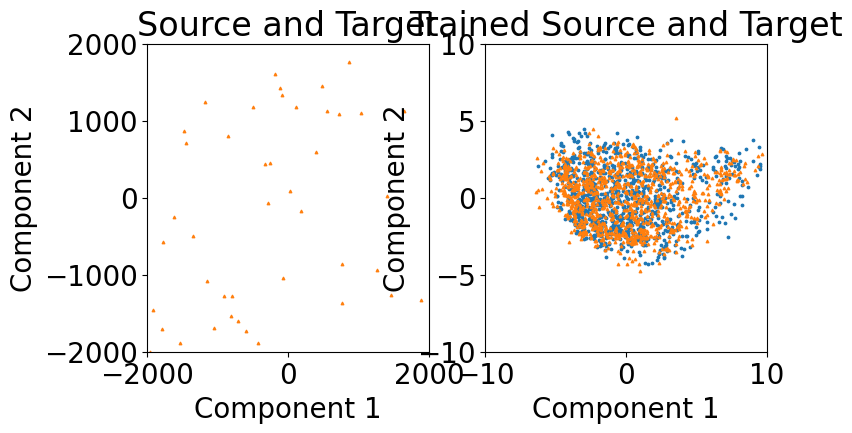

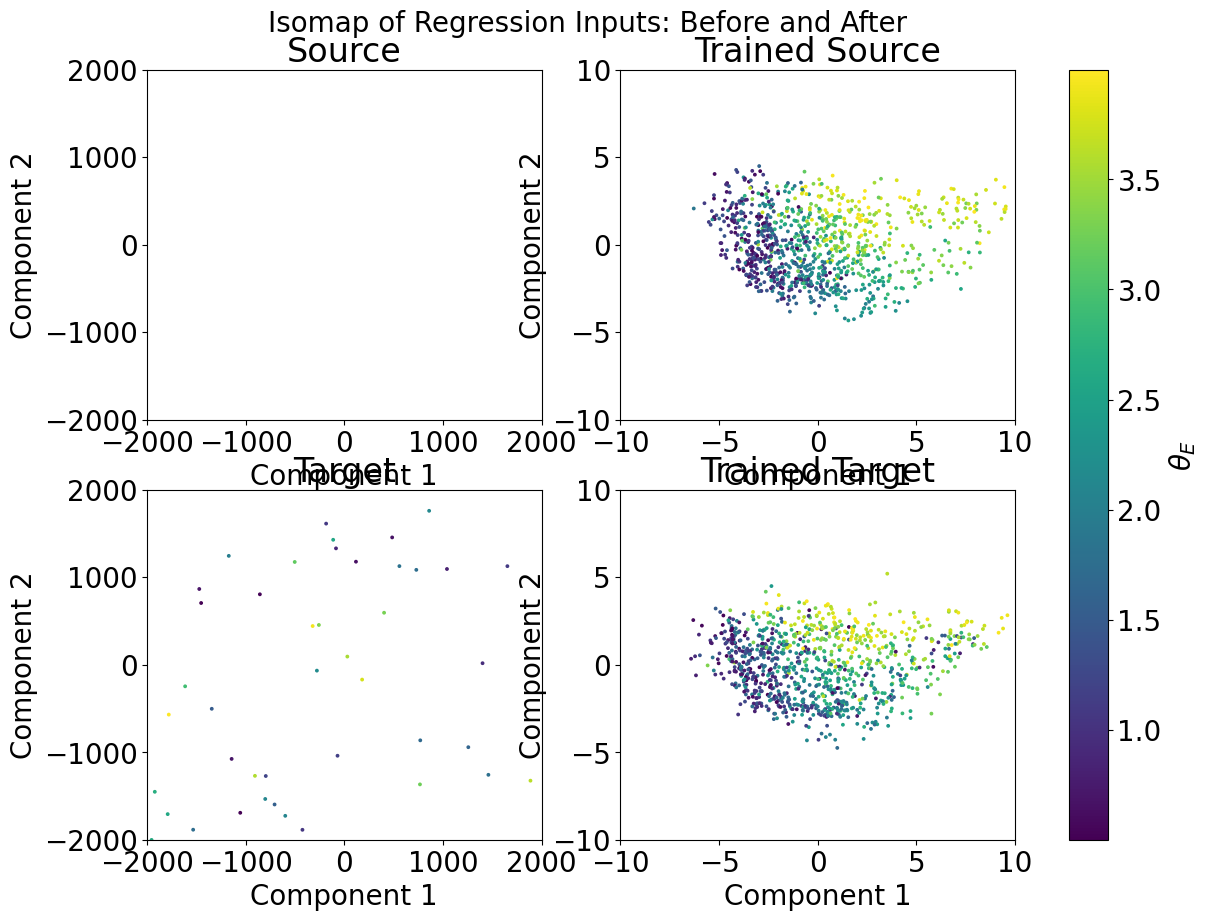

(<Figure size 800x400 with 2 Axes>,
 array([<Axes: title={'center': 'Source and Target'}, xlabel='Component 1', ylabel='Component 2'>,
        <Axes: title={'center': 'Trained Source and Target'}, xlabel='Component 1', ylabel='Component 2'>],
       dtype=object),
 <Figure size 1400x1000 with 5 Axes>,
 array([[<Axes: title={'center': 'Source'}, xlabel='Component 1', ylabel='Component 2'>,
         <Axes: title={'center': 'Trained Source'}, xlabel='Component 1', ylabel='Component 2'>],
        [<Axes: title={'center': 'Target'}, xlabel='Component 1', ylabel='Component 2'>,
         <Axes: title={'center': 'Trained Target'}, xlabel='Component 1', ylabel='Component 2'>]],
       dtype=object))

In [36]:
show_isomaps(source_iso, target_iso, trained_source_iso, trained_target_iso, source_labels, target_labels, mod_name, stats["epoch_no"], 2000, 10)

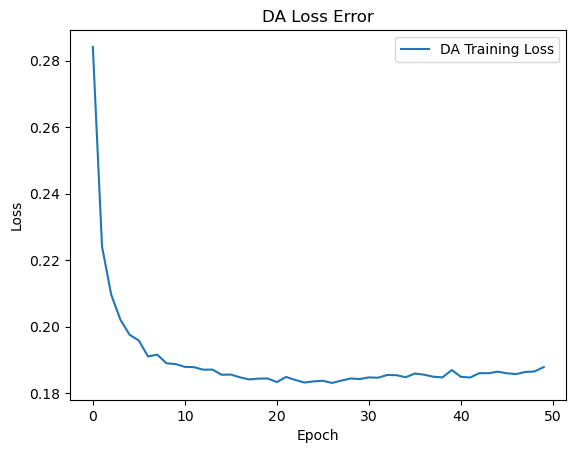

In [28]:
# Classifier
fmt = lambda k: " ".join([i.capitalize() for i in k.split('_')])
eps = np.arange(stats["epoch_no"])
plt.title("DA Loss Error")
plt.plot(eps, stats['train_DA_loss'], label = "DA Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

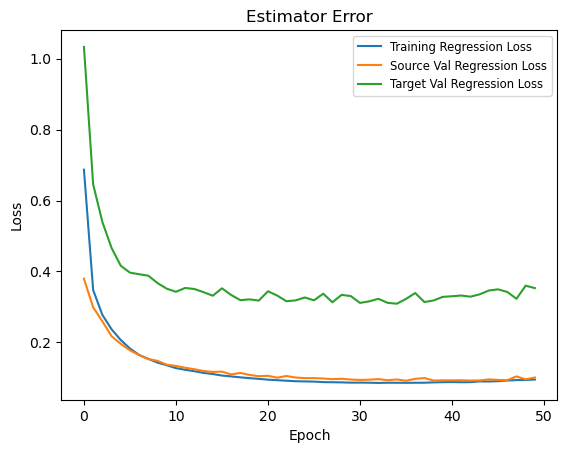

In [29]:
# Estimator
plt.title("Estimator Error")
plt.plot(eps, stats['train_regression_loss'], label = "Training Regression Loss")
plt.plot(eps, stats['val_source_regression_loss'], label = "Source Val Regression Loss")
plt.plot(eps, stats['val_target_regression_loss'], label = "Target Val Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(fontsize = 'small')

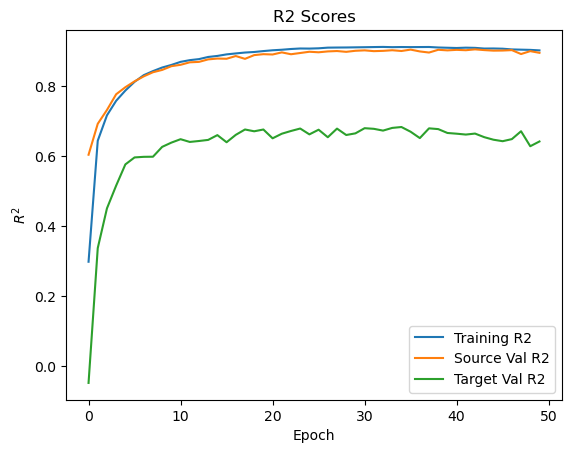

In [30]:
# R2 Scores
plt.title("R2 Scores")
plt.plot(eps, stats['train_r2_score'], label = "Training R2")
plt.plot(eps, stats['val_source_r2_score'], label = "Source Val R2")
plt.plot(eps, stats['val_target_r2_score'], label = "Target Val R2")
plt.xlabel("Epoch")
plt.ylabel("$R^2$")
plt.legend()

Source R2 Score is 0.8989


Text(0.5, 1.0, 'MMD | Source | R2: 0.899')

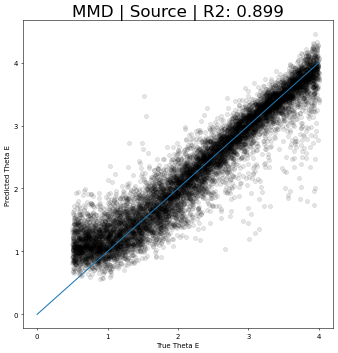

In [31]:
# Test Source
preds = np.array([])
true = np.array([])
score_list = np.array([])

with torch.no_grad():
    for X, y in source_test_dataloader:
        X = X.float()
        pred, _ = model(X.cuda())
        preds = np.append(preds, pred.cpu())
        true = np.append(true, y.cpu())
        score = r2_score(y.cpu(), pred.cpu())
        score_list = np.append(score_list, score)

score = np.mean(score_list)
print(f'Source R2 Score is {score:.4f}')

plt.figure(figsize=(8,8),dpi=50)
plt.scatter(true, preds,  color='black', alpha = 0.1)
line = np.linspace(0, 4, 100)
plt.plot(line, line)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Predicted Theta E');
plt.rc('font', size=20)
plt.title('MMD | Source | R2: {0:.3f}'.format(score))

Target R2 Score is 0.6487


Text(0.5, 1.0, 'MMD | Target | R2: 0.649')

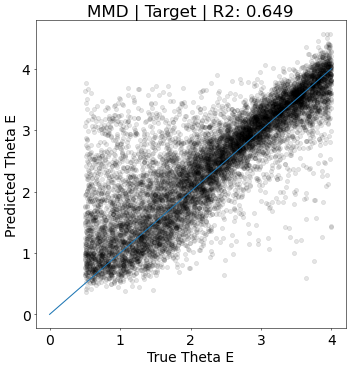

In [32]:
# Test target
preds = np.array([])
true = np.array([])
score_list = np.array([])

with torch.no_grad():
    for X, y in target_test_dataloader:
        X = X.float()
        pred, _ = model(X.cuda())
        preds = np.append(preds, pred.cpu())
        true = np.append(true, y.cpu())
        score = r2_score(y.cpu(), pred.cpu())
        score_list = np.append(score_list, score)

score = np.mean(score_list)
print(f'Target R2 Score is {score:.4f}')

plt.figure(figsize=(8,8),dpi=50)
plt.scatter(true, preds,  color='black', alpha = 0.1)
line = np.linspace(0, 4, 100)
plt.plot(line, line)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Predicted Theta E');
plt.rc('font', size=20)
plt.title('MMD | Target | R2: {0:.3f}'.format(score))